# Analysis 1 – Basic Break Even Analysis

Data tabels and break even analysis for a small business

## Preliminaries

In [1]:
# To auto-reload modules in jupyter notebook (so that changes in files *.py doesn't require manual reloading):
# https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython
%load_ext autoreload
%autoreload 2

Import commonly used libraries and magic command for inline plotting

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
%matplotlib inline

## Work

This is where work gets done.

In [4]:
from whatif import Model
from whatif import get_sim_results_df

In [5]:
class SingleProductSPF(Model):
    """Base model"""
    def __init__(self, fixed_cost=5000, var_cost=100, selling_price=115,
                 spf_constant=4900, spf_linear=-35, spf_quadratic=0.06):
        self.fixed_cost = fixed_cost
        self.var_cost = var_cost
        self.selling_price = selling_price
        self.spf_constant = spf_constant
        self.spf_linear = spf_linear
        self.spf_quadratic = spf_quadratic
        
    def demand(self):
        """Compute demand"""
        demand = (
            self.spf_quadratic * (self.selling_price ** 2) +
            (self.spf_linear * self.selling_price) +
            self.spf_constant
        )
        return demand
    
    def profit(self):
        """Compute profit"""
        demand = self.demand()
        total_cost = self.fixed_cost + (self.var_cost * demand)
        total_revenue = self.selling_price * demand
        profit = total_revenue - total_cost
        return profit
    
    def __str__(self):
        """String representation of inputs"""
        return str(vars(self))


In [6]:
hw2_model = SingleProductSPF()
print(hw2_model)

{'fixed_cost': 5000, 'var_cost': 100, 'selling_price': 115, 'spf_constant': 4900, 'spf_linear': -35, 'spf_quadratic': 0.06}


In [7]:
base_model = SingleProductSPF()
print(base_model.demand())  # Compute demand
print(base_model.profit())  # Compute profit
print(base_model)

1668.5
20027.5
{'fixed_cost': 5000, 'var_cost': 100, 'selling_price': 115, 'spf_constant': 4900, 'spf_linear': -35, 'spf_quadratic': 0.06}


In [8]:
dt_param_ranges = {'selling_price': np.arange(80, 150, 10)}
outputs = ['profit', 'demand']

In [9]:
base_dt1_df = base_model.data_table(dt_param_ranges, outputs)
base_dt1_df

,selling_price,profit,demand
0,80,-54680.0,2484.0
1,90,-27360.0,2236.0
2,100,-5000.0,2000.0
3,110,12760.0,1776.0
4,120,26280.0,1564.0
5,130,35920.0,1364.0
6,140,42040.0,1176.0


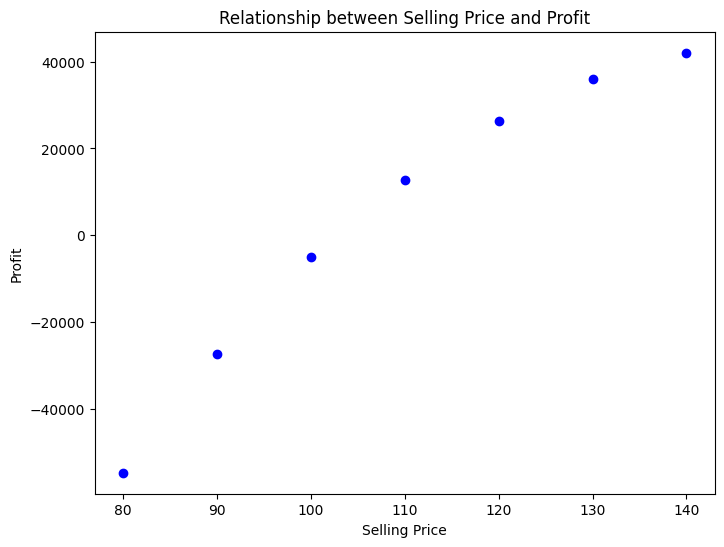

In [10]:

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(base_dt1_df['selling_price'], base_dt1_df['profit'], color='b', marker='o')

# Set the labels for the axes
plt.xlabel('Selling Price')
plt.ylabel('Profit')

# Set the title for the plot
plt.title('Relationship between Selling Price and Profit')

# Display the plot
plt.show()


### The relationship is nonlinear. The graph does not form a straight line, indicating that the change in profit is not directly proportional to the change in selling price. We used a quadratic equation so we expected this outcome.

In [11]:
# Specify input ranges for scenarios (dictionary)
dt_param_ranges = {'selling_price': np.arange(80, 150, 10)}

# Specify desired outputs (list)
outputs = ['profit', 'demand']

# Use data_table function to create dataframe
base_dt2_df = base_model.data_table(dt_param_ranges, outputs)

# Use goal_seek to compute break even demand
base_even_selling_price = base_model.goal_seek('profit', 0, 'selling_price', 80, 150)

In [12]:
base_dt2_df

,selling_price,profit,demand
0,80,-54680.0,2484.0
1,90,-27360.0,2236.0
2,100,-5000.0,2000.0
3,110,12760.0,1776.0
4,120,26280.0,1564.0
5,130,35920.0,1364.0
6,140,42040.0,1176.0


In [13]:
base_even_selling_price

102.57578606424767

In [14]:
two_dt_param_ranges = {'selling_price': np.arange(80, 150, 10),
                   'var_cost': np.arange(85, 100, 5)}
outputs = ['profit', 'demand']

base_two_way_df = base_model.data_table(two_dt_param_ranges, outputs)
base_two_way_df

,selling_price,var_cost,profit,demand
0,80,85,-17420.0,2484.0
1,80,90,-29840.0,2484.0
2,80,95,-42260.0,2484.0
3,90,85,6180.0,2236.0
4,90,90,-5000.0,2236.0
5,90,95,-16180.0,2236.0
6,100,85,25000.0,2000.0
7,100,90,15000.0,2000.0
8,100,95,5000.0,2000.0
9,110,85,39400.0,1776.0


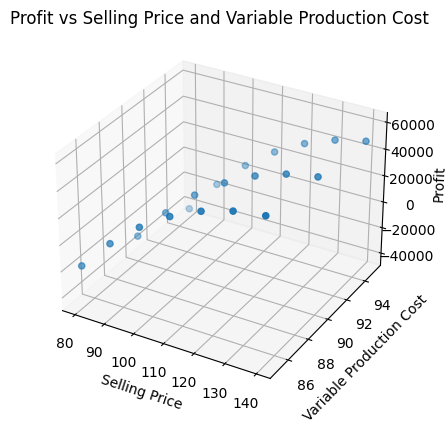

In [15]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract the data from the two-way data table
price_values = base_two_way_df['selling_price']
cost_values = base_two_way_df['var_cost']
profit_values = base_two_way_df['profit']

# Plot the data points
ax.scatter(price_values, cost_values, profit_values)

# Set labels and title
ax.set_xlabel('Selling Price')
ax.set_ylabel('Variable Production Cost')
ax.set_zlabel('Profit')
ax.set_title('Profit vs Selling Price and Variable Production Cost')

# Show the plot
plt.show()


In [16]:
# Specify input ranges for scenarios (dictionary)
dt_param_ranges = {'selling_price': np.arange(80, 260, 10)}

# Specify desired outputs (list)
outputs = ['profit', 'demand']

# Use data_table function to create dataframe
base_dt2_df = base_model.data_table(dt_param_ranges, outputs)

# Use goal_seek to compute break even demand
base_even_selling_price = base_model.goal_seek('profit', 0, 'selling_price', 80, 250)


In [17]:
base_dt2_df

,selling_price,profit,demand
0,80,-54680.0,2484.0
1,90,-27360.0,2236.0
2,100,-5000.0,2000.0
3,110,12760.0,1776.0
4,120,26280.0,1564.0
5,130,35920.0,1364.0
6,140,42040.0,1176.0
7,150,45000.0,1000.0
8,160,45160.0,836.0
9,170,42880.0,684.0


In [18]:
base_even_selling_price

### Looks like the goal seek failed. There are multiple points where we reach 0.

In [25]:
# Set the random seed for reproducibility
np.random.seed(123)

# Define the number of simulations
num_simulations = 1000

# Generate random variable costs from a uniform distribution
variable_cost_simulations = np.random.uniform(80, 120, num_simulations)

In [26]:
variable_cost_simulations

array([107.85876742,  91.4455734 ,  89.07405814, 102.05259076,
       108.77875879,  96.9242584 , 119.23056794, 107.39318954,
        99.23727606,  95.68470073,  93.72712065, 109.1619883 ,
        97.54288979,  82.38711586,  95.92177021, 109.51981623,
        87.29966922,  87.01807025, 101.26205495, 101.27310348,
       105.37603834, 113.97727176, 108.97821299, 104.44094043,
       108.8977353 ,  92.91835655,  94.47154622,  89.13052924,
        91.74856186, 105.23904495,  83.6841976 ,  97.34804691,
        97.23451053,  99.74740391,  97.03321161,  92.49044892,
        97.05405228, 115.73556652, 117.76640073, 100.07346704,
       104.95811807,  84.6247358 ,  92.69141927,  96.59304848,
       114.65236632,  90.01821462,  99.32137057, 119.42239142,
       100.77940477, 104.51578103,  84.82514664, 113.05363202,
       104.12240514, 101.80272026,  93.71055335,  92.16483156,
        96.68088844, 107.25203063, 115.01827367, 100.4168935 ,
       106.77255132, 103.4374621 , 104.99614008, 106.98

In [27]:
# Calculate the profit for each simulation
profit_simulations = []
for variable_cost in variable_cost_simulations:
    # Update the variable cost in the model
    base_model.update({'var_cost': variable_cost})
    # Compute the profit for the current simulation
    profit = base_model.profit()
    profit_simulations.append(profit)

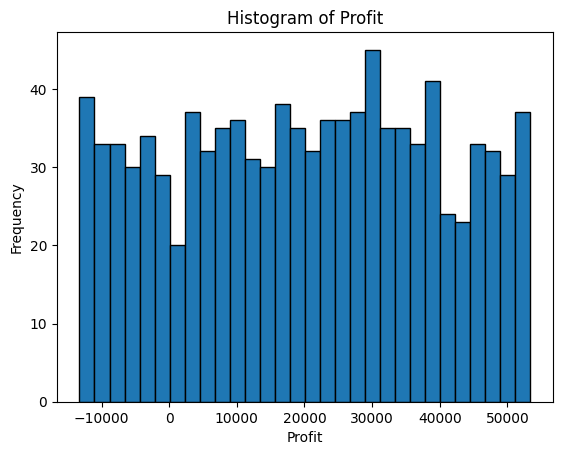

Probability of profit being negative: 0.198


In [28]:
plt.hist(profit_simulations, bins=30, edgecolor='black')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Histogram of Profit')
plt.show()

# Calculate the probability of negative profit
negative_profit_probability = np.mean(np.array(profit_simulations) < 0)
print("Probability of profit being negative:", negative_profit_probability)